In [1]:
from scipy.optimize import curve_fit
from scipy import interpolate
import numpy as np
import matplotlib.pyplot

#%matplotlib notebook  #to make the graph interactive

In [2]:
#import parametres
data1=np.loadtxt(fname='Data_from_Igor.csv', delimiter=',')

T1= (data1[:,0]) #Field strength values calculated in 2015
Freq1=(data1[:,1]) #Frequency data collected in 2015
X1 = (data1[:,2]) #Positions at which the frequency data was collected 


In [3]:
# define constants
munought = 1.257e-6 #Permittivity of a vaccum
gammareduced = 6.536 #gyromagentic ratio in terms of MHz per second

In [4]:
#define the functions
def funcbiot2(x, a, b,c):
    return (munought*91.96*a*(b**2))/(2*((((x-c)**2)+(b**2))**(3/2)))

In [8]:
X1here = X1[9:24]
T1here = T1[9:24]
# By trial and error this is the best range to get a fit that allows points to join up, as proven one cell down
# Then fit with this range of data points
popt, pcov = curve_fit(funcbiot2, X1here, T1here, p0= (100e4,0.050,0.136))
print (popt) #the fit coefficients
perr = np.sqrt(np.diag(pcov))
print (perr) #the error on the coefficients

xhere=np.arange(0.1276,0.6,0.001)
yhere= funcbiot2(xhere, *popt) #fit function. 0.6 is like the maximum I could go down by


[3.50105937e+04 2.16699171e-01 1.35942253e-01]
[8.99400682e+02 5.42284765e-03 1.62405893e-03]


In [9]:
# adjusting for magnet decay
Freq_adjustment = Freq1[0]-61.408425 #measured resonant frequency in the middle
Field_adjustment = Freq_adjustment/gammareduced

yhere_adjusted = yhere-Field_adjustment
T1_adjusted = T1 -Field_adjustment

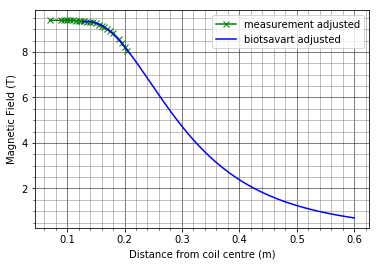

In [10]:
matplotlib.pyplot.plot(X1, T1_adjusted, linewidth=1.5, color='g', linestyle = '-', marker='x', markeredgecolor='g', markerfacecolor='white', label='measurement adjusted')

matplotlib.pyplot.plot(xhere, yhere_adjusted, linewidth=1.5, color='b', linestyle = '-', marker='', markeredgecolor='g', markerfacecolor='white', label='biotsavart adjusted')

matplotlib.pyplot.ylabel ('Magnetic Field (T)')
matplotlib.pyplot.xlabel ('Distance from coil centre (m)')
matplotlib.pyplot.legend()
matplotlib.pyplot.minorticks_on()
matplotlib.pyplot.grid (which='major', linestyle='-', linewidth='0.5', color='black')
matplotlib.pyplot.grid (which='minor', linestyle='-', linewidth='0.5', color='grey')
matplotlib.pyplot.show()

In [11]:
# resonant frequency graph

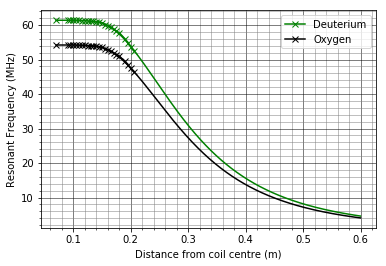

In [15]:
Freqhere_adjusted = yhere_adjusted*gammareduced
Freq1_adjusted = Freq1 - Freq_adjustment

Freq1_adjusted_oxygen = (Freq1_adjusted /gammareduced)*5.772
Freqhere_adjusted_oxyen = (Freqhere_adjusted /gammareduced)*5.772

matplotlib.pyplot.plot(X1, Freq1_adjusted, linewidth=1.5, color='g', linestyle = '-', marker='x', markeredgecolor='g', markerfacecolor='white', label='Deuterium')
matplotlib.pyplot.plot (xhere, Freqhere_adjusted,'g-')
matplotlib.pyplot.plot(X1, Freq1_adjusted_oxygen, linewidth=1.5, color='k', linestyle = '-', marker='x', markeredgecolor='k', markerfacecolor='white', label='Oxygen')
matplotlib.pyplot.plot (xhere, Freqhere_adjusted_oxyen,'k-')


matplotlib.pyplot.ylabel ('Resonant Frequency (MHz)')
matplotlib.pyplot.xlabel ('Distance from coil centre (m)')
matplotlib.pyplot.legend()
matplotlib.pyplot.minorticks_on()
matplotlib.pyplot.grid (which='major', linestyle='-', linewidth='0.5', color='black')
matplotlib.pyplot.grid (which='minor', linestyle='-', linewidth='0.5', color='grey')
matplotlib.pyplot.show()

In [16]:
#The gradient graph

In [18]:
i = 4.04583630e+07 
R= 2.16699173e-01
c=1.35942253e-01 # fit parametres
#calculate the gradient from the differential
u = (xhere-c)**2 + R**2
dBdU = (-1.5*munought*i*R**2)/(8*np.pi*u**(5/2))
dUdx= 2*(xhere-c)
Gradienthere= dBdU*dUdx

In [19]:
#Find the gradient between each point
g1 = (T1[0]- T1[1])/(X1[0]- X1[1])
g2 = (T1[1]- T1[2])/(X1[1]- X1[2])
g3 = (T1[2]- T1[3])/(X1[2]- X1[3])
g4 = (T1[3]- T1[4])/(X1[3]- X1[4])
g5 = (T1[4]- T1[5])/(X1[4]- X1[5])
g6 = (T1[5]- T1[6])/(X1[5]- X1[6])
g7 = (T1[6]- T1[7])/(X1[6]- X1[7])
g8 = (T1[7]- T1[8])/(X1[7]- X1[8])
g9 = (T1[8]- T1[9])/(X1[8]- X1[9])
g10 = (T1[9]- T1[10])/(X1[9]- X1[10])
g11 = (T1[10]- T1[11])/(X1[10]- X1[11])
g12 = (T1[11]- T1[12])/(X1[11]- X1[12])
g13 = (T1[12]- T1[13])/(X1[12]- X1[13])
g14 = (T1[13]- T1[14])/(X1[13]- X1[14])
g15 = (T1[14]- T1[15])/(X1[14]- X1[15])
g16 = (T1[15]- T1[16])/(X1[15]- X1[16])
g17 = (T1[16]- T1[17])/(X1[16]- X1[17])
g18 = (T1[17]- T1[18])/(X1[17]- X1[18])
g19 = (T1[18]- T1[19])/(X1[18]- X1[19])
g20 = (T1[19]- T1[20])/(X1[19]- X1[20])
g21 = (T1[20]- T1[21])/(X1[20]- X1[21])
g22 = (T1[21]- T1[22])/(X1[21]- X1[22])
g23 = (T1[22]- T1[23])/(X1[22]- X1[23])

X_interps = [0.08 , 0.0925 , 0.0975, 0.1025 ,  0.1075, 0.1125 , 0.1175 ,0.1225 , 0.1275, 0.1325 , 0.1375 ,0.1425,
 0.1475 ,0.1525,  0.1575, 0.1625 , 0.1675 ,0.1725 , 0.1775, 0.185 , 0.1925 , 0.1975, 0.2025]
G_interps = (g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, g17, g18, g19, g20, g21, g22, g23)

#take out the ones that dont smoothly fit
X_interps_cut = [0.08 , 0.0925 , 0.0975, 0.1025 ,  0.1075, 0.1125  ,0.1225 ,  0.1375 ,
 0.1475 ,  0.1575, 0.1625 , 0.1675 ,  0.1925,  0.1975, 0.2025]
G_interps_cut = (g1, g2, g3, g4, g5, g6,  g8,  g11,  g13, g15, g16, g17, g20 ,g22, g23)


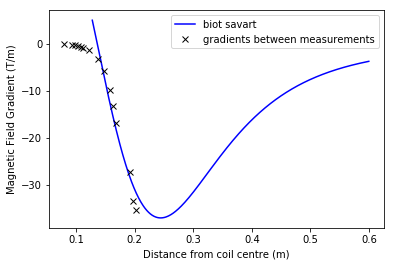

In [20]:
matplotlib.pyplot.plot (xhere, Gradienthere,'b-', label = 'biot savart')
matplotlib.pyplot.plot (X_interps_cut, G_interps_cut,'kx', label = 'gradients between measurements')

matplotlib.pyplot.ylabel ('Magnetic Field Gradient (T/m)')
matplotlib.pyplot.xlabel ('Distance from coil centre (m)')


From interpolation, at 0.19558049127640037 m, the field is 8.369067625458998 T, and the gradient is -30.969221948574123


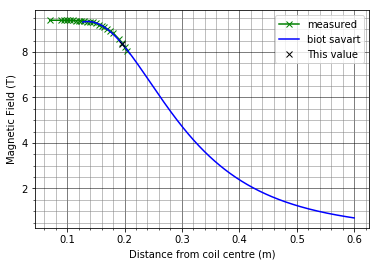

In [23]:
# find the gradient given a certain resonant frequency

Freq_question =54.700226 #insert here
Freq1_flip = Freq1_adjusted[::-1]
X1_flip =X1[::-1]

x_answer=np.interp (Freq_question,Freq1_flip, X1_flip)

B_answer = Freq_question /gammareduced

gradientinterp= np.interp (x_answer, X_interps_cut, G_interps_cut)

print ('From interpolation, at', x_answer, 'm, the field is',B_answer, 'T, and the gradient is',gradientinterp)

#plot this point with the curve to check it makes sense
matplotlib.pyplot.plot(X1, T1_adjusted, linewidth=1.5, color='g', linestyle = '-', marker='x', markeredgecolor='g', markerfacecolor='white', label='measured')

matplotlib.pyplot.plot (xhere, yhere_adjusted,'b-', label = 'biot savart')
matplotlib.pyplot.plot (x_answer, B_answer,'kx', label = 'This value')

matplotlib.pyplot.ylabel ('Magnetic Field (T)')
matplotlib.pyplot.xlabel ('Distance from coil centre (m)')
matplotlib.pyplot.legend()
matplotlib.pyplot.minorticks_on()
matplotlib.pyplot.grid (which='major', linestyle='-', linewidth='0.5', color='black')
matplotlib.pyplot.grid (which='minor', linestyle='-', linewidth='0.5', color='grey')

matplotlib.pyplot.show()

In [ ]:
#